<a href="https://colab.research.google.com/github/ak-ghoul/Deep-Learning/blob/master/PyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [0]:
import torchvision  # to do computer vision tasks using pytorch
import torchvision.transforms as transforms

In [0]:
trainset = torchvision.datasets.CIFAR10(root = '/data', train=True, download = True, transform = transforms.ToTensor())

0it [00:00, ?it/s]


0it [00:00, ?it/s]
  0%|          | 0/170498071 [00:00<?, ?it/s]

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to /data/cifar-10-python.tar.gz



 98%|█████████▊| 167518208/170498071 [00:05<00:00, 31691930.29it/s]
170500096it [00:05, 28735975.55it/s]                               


Extracting /data/cifar-10-python.tar.gz to /data


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'deer') # because labels will have o/p in as 0,1,2...

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, shuffle = True, batch_size=4)

In [0]:
data_iter = iter(trainloader)
image, labels = data_iter.next()
print(image.shape) # all 4 images are loaded in image variable. 3 represents the r,g,b layers and each image is of 32*32 size.
print(labels.shape) # 4 labels for 4 images

torch.Size([4, 3, 32, 32])
torch.Size([4])


In [0]:
img = image[0]
np_img = img.numpy()
print(np_img.shape)

(3, 32, 32)


In [0]:
np_img = np.transpose(np_img, (1, 2, 0)) # 32*32 are the main size so should be before 3. (1,2,0) denotes the axes in order

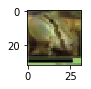

In [0]:
plt.figure(figsize = (1,1))
plt.imshow(np_img)  # an image has to be converted into numpy to plot it using imshow and it's dimensions must be correct
plt.show()    # imshow expects dimensions in form of (x, y, rgb) --> (32, 32, 3)

In [0]:
def img_show(img):
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1, 2, 0)))
  plt.show()

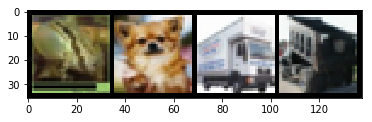

frog dog deer deer


In [0]:
img_show(torchvision.utils.make_grid(image))
print(' '.join(classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16,kernel_size=3) # a convolutional layer has been defined 
  
  def forward(self, X):
    x = self.conv1(X)
    return x

In [0]:
obj = FirstCNN()
out = obj(image)
out.shape # 4(no of images), 16(size of conv layer), 30*30(reduced size of images as per kernel) no padding is done so, 32 is decreased to 30

torch.Size([4, 16, 30, 30])

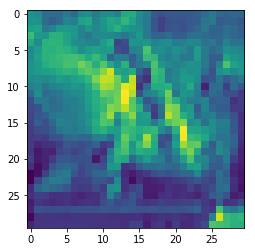

In [0]:
plt.imshow(out[0, 0, :,:].detach().numpy()) # for 0th image, 0th channel, all values of x,y image
plt.show() # this filter is applied

In [0]:
class Conv(nn.Module):
  def __init__(self):
    super(Conv, self).__init__()
    self.module = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5), #(N, 6, 28, 28)
        nn.AvgPool2d(kernel_size=2, stride=2), #(N, 6, 14, 14)
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), #(N, 16, 10, 10)
        nn.AvgPool2d(kernel_size=2, stride=2) #(N, 16, 5, 5)
    )
  
  def forward(self, X):
    return self.module(X)

In [0]:
obj = Conv()
out = obj(image)
out.shape

torch.Size([4, 16, 5, 5])

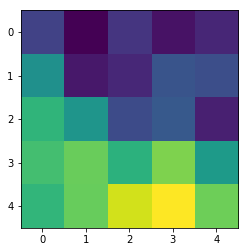

In [0]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

In [0]:
class LeNet(nn.Module):              # for a lenet network I drew on my notes
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5), #(N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2), # (N, 6, 14, 14)
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), #(N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2) #(N, 16, 5, 5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),  # 16 * 5 * 5 = 400
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
  
  def forward(self, X):
    x = self.cnn_model(X)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    x = self.fc_model(x)   # softmax is not applied because max of linear is max of softmax. after backpropagation we need to apply softmax()
    print(x.shape)    
    return x

In [0]:
obj = LeNet()
out = obj(image)

torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [0]:
print(out)

tensor([[ 0.0166, -0.0839,  0.1136, -0.0845, -0.0246, -0.0161, -0.0997, -0.0465,
          0.0617,  0.1428],
        [ 0.0264, -0.0788,  0.1082, -0.0946, -0.0201, -0.0296, -0.0903, -0.0675,
          0.0416,  0.1450],
        [ 0.0305, -0.0864,  0.1243, -0.0923, -0.0168, -0.0190, -0.1087, -0.0448,
          0.0557,  0.1440],
        [ 0.0122, -0.0629,  0.1021, -0.0878, -0.0508, -0.0316, -0.0779, -0.0236,
          0.0436,  0.1465]], grad_fn=<AddmmBackward>)


In [0]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([9, 9, 9, 9])


#Training LeNet

In [0]:
class LeNet_v2(nn.Module):
  def __init__(self):
    super(LeNet_v2, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride = 2)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
  
  def forward(self, X):
    x = self.cnn_model(X)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

In [0]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root = '/data', train = True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
testset = torchvision.datasets.CIFAR10(root = '/data', train = False, download = True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, shuffle = False, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    image, label = data
    output = net(image)
    max_value, pred = torch.max(output.data, 1)
    total += label.size(0)   # total number of outputs
    correct += (pred == label).sum().item() # sum because we calculate based on number of matching outputs.
  return  100 * (correct/total)  

In [0]:
net = LeNet_v2()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


Training Accuracy: 64.878
Testing Accuracy: 55.26


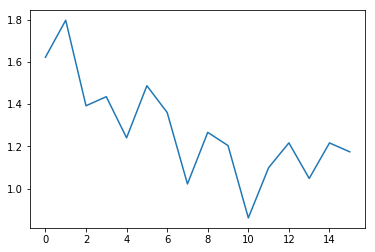

CPU times: user 5min 10s, sys: 5.24 s, total: 5min 15s
Wall time: 5min 16s


In [0]:
%%time
from tqdm import tqdm_notebook
loss = {}
epochs = 16
for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epochs'):
  for j,data in enumerate(trainloader, 0):
    image, labels = data
    opt.zero_grad()

    output = net(image)
    loss_ = loss_fn(output, labels)
    loss_.backward()
    opt.step()

  loss[i] = loss_.item()
print('Training Accuracy:',evaluation(trainloader))
print('Testing Accuracy:',evaluation(testloader))
plt.plot(loss.values())
plt.show() 

#With GPU Acceleration

In [0]:
import torch.device

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    image, label = data
    image = image.to(device)
    label = label.to(device)
    output = net(image)
    _, pred = torch.max(output.data, 1)
    total += label.size(0)
    correct += (pred == label).sum().item()
  return 100 * (correct/total)

In [0]:
net = LeNet_v2().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


Training Accuracy: 81.598
 Testing accuracy: 54.05


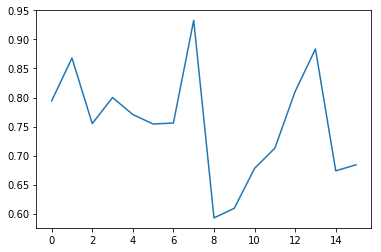

CPU times: user 2min 14s, sys: 1.43 s, total: 2min 15s
Wall time: 2min 15s


In [0]:
%%time
loss_ = {}
epochs = 16
for i in tqdm_notebook(range(epochs), unit = 'epochs', total = epochs):
  for j,data in enumerate(trainloader, 0):
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    opt.zero_grad()

    out = net(images)
    loss = loss_fn(out, labels)
    loss.backward()
    opt.step()
  
  loss_[i] = loss.item()
print('Training Accuracy: {}\n Testing accuracy: {}'.format(evaluation(trainloader),evaluation(testloader)))
plt.plot(loss_.values())
plt.show()